## In here, Based Paper Code and in this paper we found some model,

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/predict-ovarian-cancer")

print("Path to dataset files:", path)

Path to dataset files: /Users/kmyeaserarafat/.cache/kagglehub/datasets/saurabhshahane/predict-ovarian-cancer/versions/1


In [2]:
import pandas as pd

data = pd.read_excel('archive/Supplementary data 1.xlsx')
data.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [3]:
data.shape

(349, 51)

#### Data-Preprocessing

In [4]:
## Check Null value is avaiable or not !
data.isnull().sum()

SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9         24
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

In [5]:
# This column data type is object and here instance 22 so, 
ObjectColumnName = ['AFP','AG', 'Age','CA125','CA19-9']

def ObjectNullValueRecover(columnName):
    for cn in columnName:
            data[cn] = data[cn].astype(str).str.replace('\t', '', regex=False)
            data[cn] = pd.to_numeric(data[cn],errors='coerce')
            data[cn] = data[cn].fillna(data[cn].mean())

ObjectNullValueRecover(ObjectColumnName)

In [6]:
# Neumecial Column Remove Null Value, 
neumerical_Column = ['AG', 'ALB','ALP','ALT','AST','CEA','CO2CP','DBIL','GGT','GLO','HE4','IBIL','MPV','NEU','TBIL','TP','PCT','PDW']

def nullValueRecover_Neumeric(columnName):
    for cn in columnName:
        data[cn] = data[cn].fillna(data[cn].mean())


nullValueRecover_Neumeric(neumerical_Column)

In [7]:
# Drop Column 

data = data.drop(columns=['CA72-4']) # 240 null values found!


In [8]:

def checkColumnDetails(columnName):
    print(f"Data Type : {data[columnName].dtype}")
    print(f"Null Value : {data[columnName].isnull().sum()}")
    print(f"Data Unique : {data[columnName].unique()}")
    print(f"Value Counts : {data[columnName].value_counts()}")


checkColumnDetails('PDW')

Data Type : float64
Null Value : 0
Data Unique : [13.4        11.2        15.2        17.4        11.9        19.1
 16.8        15.1        16.9         8.8        10.4        20.2
 11.         16.5        11.8        16.1        12.7        13.7
 10.6        17.3        12.1        11.4        15.5        15.4
 18.65       17.9        14.1        11.7        17.2        18.8
 17.         14.3        10.2         9.9        20.47        8.9
 18.2        16.3        20.6        13.1        17.1        16.7
 10.1        18.         13.3        16.08       13.5        14.2
 10.9        11.5        15.7        10.3        14.6        12.3
 17.5        16.4        16.22       22.5        10.7         9.3
 22.8        22.         16.2        16.52       12.8        14.9
 14.7        14.5        19.6        18.67       11.3        10.5
 21.6        19.3        17.6        12.4        20.4        12.6
 18.1        16.06       18.9        17.7        18.4        13.8
 12.2        14.4        16

In [9]:
data.isnull().sum()

SUBJECT_ID    0
AFP           0
AG            0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BASO#         0
BASO%         0
BUN           0
Ca            0
CA125         0
CA19-9        0
CEA           0
CL            0
CO2CP         0
CREA          0
TYPE          0
DBIL          0
EO#           0
EO%           0
GGT           0
GLO           0
GLU.          0
HCT           0
HE4           0
HGB           0
IBIL          0
K             0
LYM#          0
LYM%          0
MCH           0
MCV           0
Menopause     0
Mg            0
MONO#         0
MONO%         0
MPV           0
Na            0
NEU           0
PCT           0
PDW           0
PHOS          0
PLT           0
RBC           0
RDW           0
TBIL          0
TP            0
UA            0
dtype: int64

#### Check Outliers

Outliers found in column: AG
Outliers found in column: ALB
Outliers found in column: ALP
Outliers found in column: ALT
Outliers found in column: AST
Outliers found in column: CEA
Outliers found in column: CO2CP
Outliers found in column: DBIL
Outliers found in column: GGT
Outliers found in column: GLO
Outliers found in column: HE4
Outliers found in column: IBIL
Outliers found in column: MPV
Outliers found in column: NEU
Outliers found in column: TBIL
Outliers found in column: TP
Outliers found in column: PCT


/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_1551/4059311238.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)


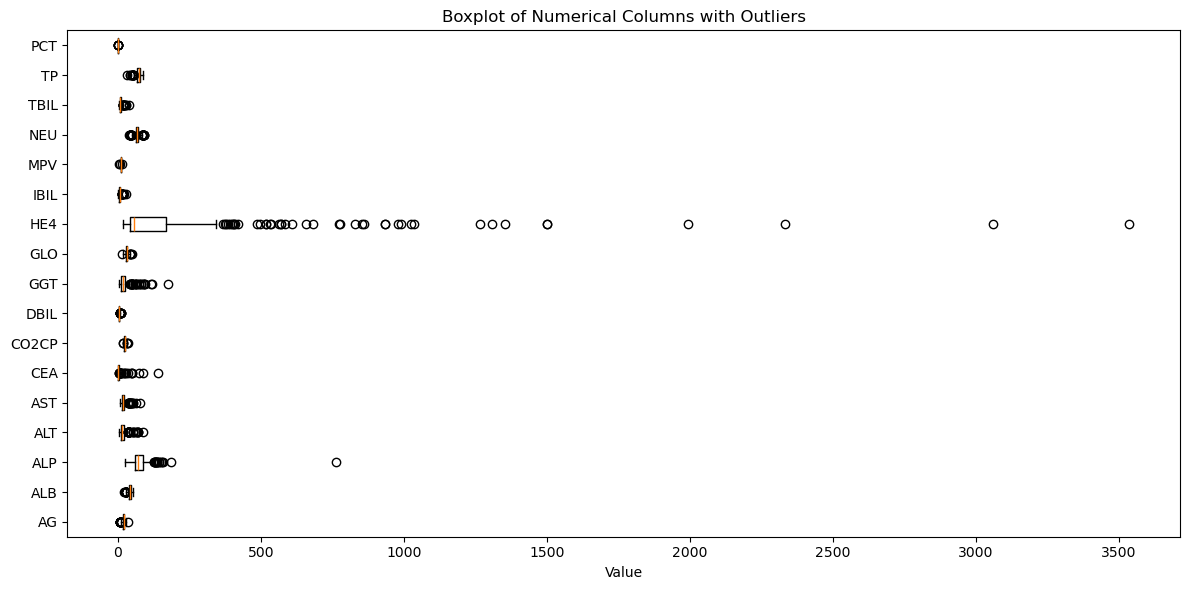

In [10]:
import matplotlib.pyplot as plt

# Check for outliers in all numerical columns and plot boxplots
outlier_columns = []
for col in neumerical_Column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    if not outliers.empty:
        outlier_columns.append(col)
        print(f"Outliers found in column: {col}")

if outlier_columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)
    plt.title("Boxplot of Numerical Columns with Outliers")
    plt.xlabel("Value")
    plt.tight_layout()
    plt.show()
else:
    print("No outlier values found in the specified numerical columns.")

🔎 Outlier Fix Summary:
 - AFP: 14 outliers clipped
 - AG: 18 outliers clipped
 - Age: 0 outliers clipped
 - ALB: 14 outliers clipped
 - ALP: 17 outliers clipped
 - ALT: 26 outliers clipped
 - AST: 18 outliers clipped
 - BASO#: 6 outliers clipped
 - BASO%: 3 outliers clipped
 - BUN: 7 outliers clipped
 - Ca: 22 outliers clipped
 - CA125: 36 outliers clipped
 - CA19-9: 31 outliers clipped
 - CEA: 22 outliers clipped
 - CL: 15 outliers clipped
 - CO2CP: 5 outliers clipped
 - CREA: 7 outliers clipped
 - DBIL: 15 outliers clipped
 - EO#: 18 outliers clipped
 - EO%: 19 outliers clipped
 - GGT: 27 outliers clipped
 - GLO: 6 outliers clipped
 - GLU.: 25 outliers clipped
 - HCT: 11 outliers clipped
 - HE4: 43 outliers clipped
 - HGB: 18 outliers clipped
 - IBIL: 11 outliers clipped
 - K: 5 outliers clipped
 - LYM#: 11 outliers clipped
 - LYM%: 0 outliers clipped
 - MCH: 23 outliers clipped
 - MCV: 18 outliers clipped
 - Menopause: 0 outliers clipped
 - Mg: 9 outliers clipped
 - MONO#: 12 outlie

/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_1551/2467826208.py:42: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


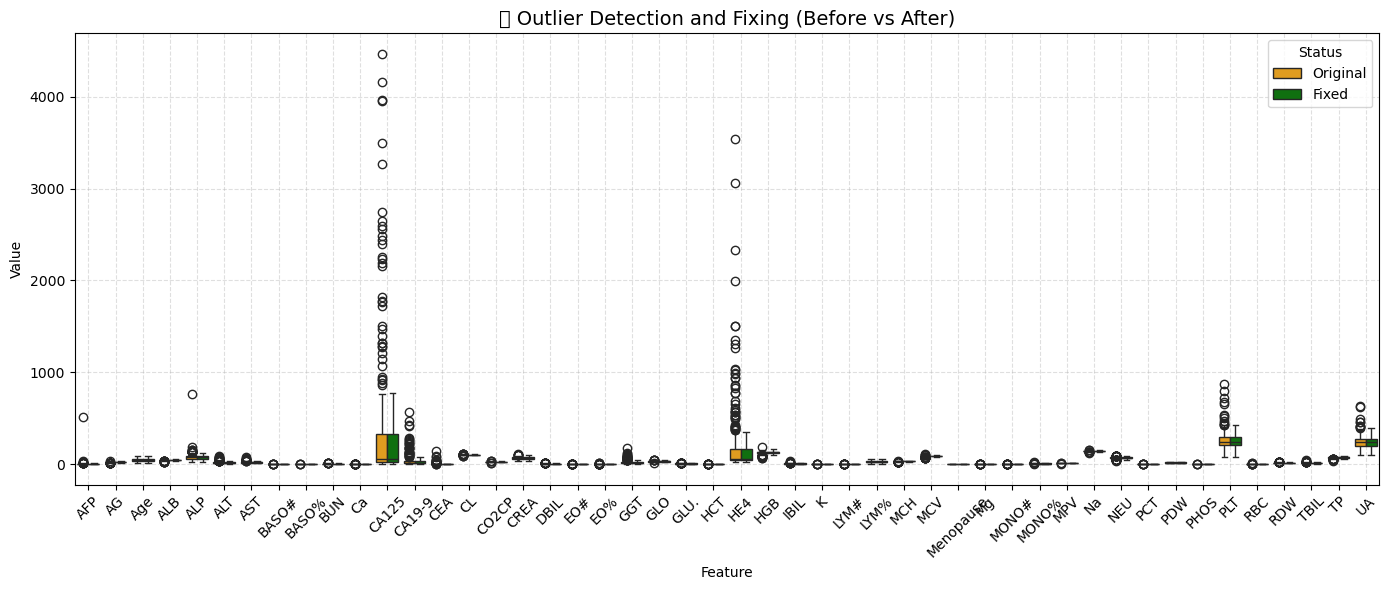

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns (drop ID or labels)
numeric_data = data.drop(columns=['SUBJECT_ID', 'TYPE'], errors='ignore').select_dtypes(include='number')

# Step 2: Function to fix outliers using IQR method
def fix_outliers(df):
    df_fixed = df.copy()
    print("🔎 Outlier Fix Summary:")
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f" - {col}: {outliers} outliers clipped")
        df_fixed[col] = df[col].clip(lower=lower, upper=upper)
    return df_fixed

# Step 3: Apply outlier fixing
clean_data = fix_outliers(numeric_data)

# Step 4: Prepare data for one combined boxplot
original_melted = numeric_data.melt(var_name='Feature', value_name='Value')
original_melted['Status'] = 'Original'

clean_melted = clean_data.melt(var_name='Feature', value_name='Value')
clean_melted['Status'] = 'Fixed'

combined = pd.concat([original_melted, clean_melted])

# Step 5: Plot all features in one compact boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=combined, x='Feature', y='Value', hue='Status', palette=['orange', 'green'])
plt.title('📦 Outlier Detection and Fixing (Before vs After)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Feature Selection 

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif


X_features = data.drop(columns=['SUBJECT_ID', 'TYPE'])
y_target = data['TYPE']

selector = SelectKBest(score_func=f_classif, k=18)
X_selected = selector.fit_transform(X_features, y_target)

selected_feature_names = X_features.columns[selector.get_support(indices=True)]
print("Selected features:", list(selected_feature_names))



Selected features: ['Age', 'ALB', 'ALP', 'AST', 'CA125', 'GLO', 'HE4', 'HGB', 'IBIL', 'LYM#', 'LYM%', 'Menopause', 'MONO#', 'NEU', 'PCT', 'PLT', 'TBIL', 'TP']


* conda create -n mrmr_env python=3.10 -y
* conda activate mrmr_env
* pip install pandas==1.5.3 scikit-learn==1.2.2 mrmr-selection==0.2.7

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from mrmr import mrmr_classif

X = data.drop(columns=['SUBJECT_ID', 'TYPE'])
y = data['TYPE']


if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)


X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

# Apply mRMR
selected_features = mrmr_classif(X=X_scaled, y=y, K=18)

print("Top 18 features:", selected_features)


100%|██████████| 18/18 [00:00<00:00, 73.59it/s]

Top 18 features: ['Age', 'CEA', 'IBIL', 'CA125', 'Menopause', 'NEU', 'ALB', 'HE4', 'GLO', 'LYM%', 'AST', 'PLT', 'HGB', 'ALP', 'LYM#', 'PCT', 'CA19-9', 'Ca']


### Data-Spliting, 

In [14]:
from sklearn.model_selection import train_test_split

x = data[selected_features]
y = data['TYPE']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print("Traing x Data Shape: ", x_train.shape)
print("Training y Data Shape : ", y_train.shape)
print("Testing x Data Shape: ", x_test.shape)
print("Testing y Data Shape: ", y_test.shape)


Traing x Data Shape:  (279, 18)
Training y Data Shape :  (279,)
Testing x Data Shape:  (70, 18)
Testing y Data Shape:  (70,)


## Model 

#### KNN


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_Model = knn.fit(x_train, y_train)

# Prediction 
knn_pred = knn_Model.predict(x_test)

knn_Model


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy: 0.8286
Precision: 0.8108
Recall: 0.8571
Sensitivity: 0.8571
F1-score: 0.8333


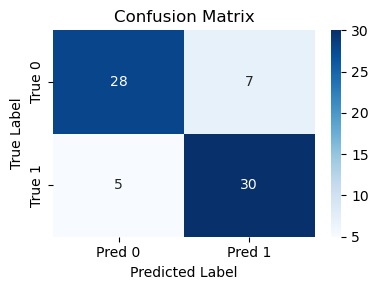

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

accuracy = knn_Model.score(x_test, y_test)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
confusionMatrix = confusion_matrix(y_test, knn_pred)


# Sensitivity is the same as recall for the positive class
sensitivity = recall

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")


plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------

#### SVM

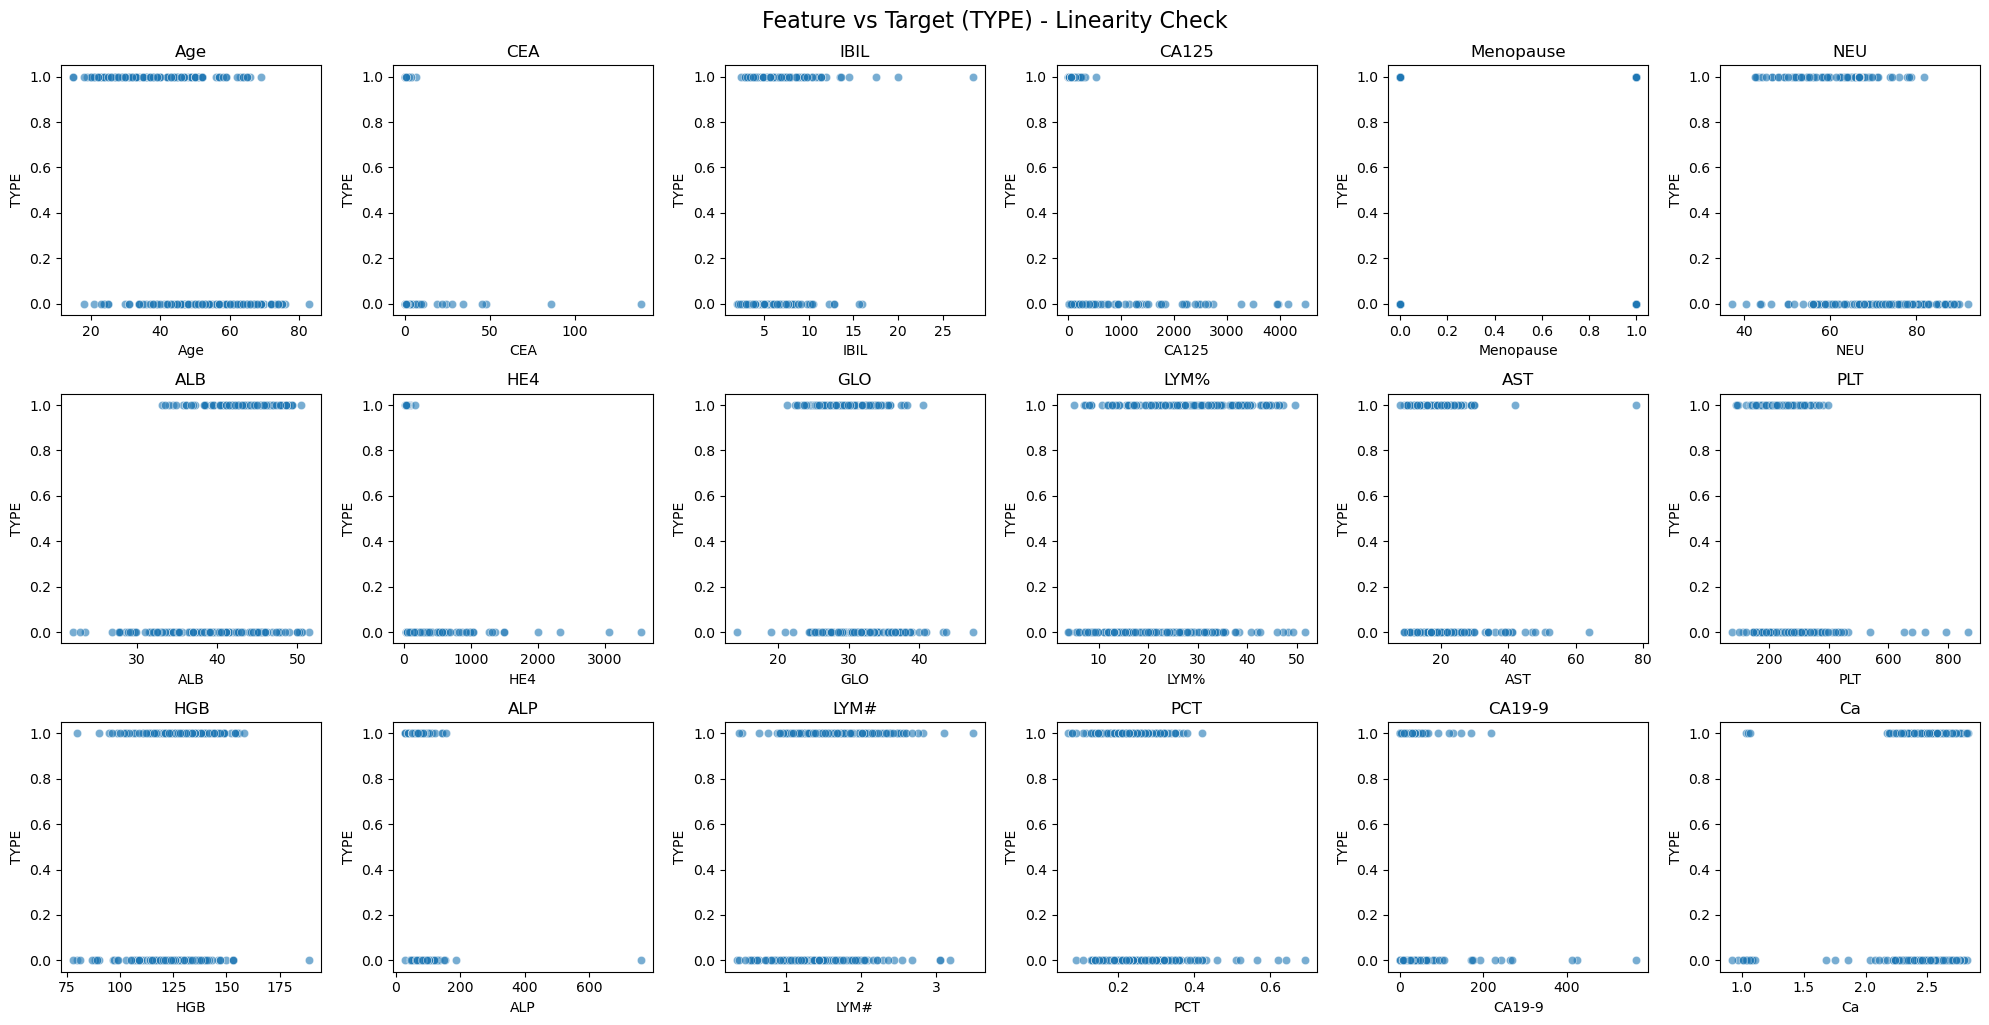

In [17]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 6, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(x_train.columns):
    sns.scatterplot(x=x[col], y=y_train, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('TYPE')

plt.tight_layout()
plt.suptitle('Feature vs Target (TYPE) - Linearity Check', y=1.02, fontsize=16)
plt.show()

In [18]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm_model = svm.fit(x_train, y_train)

# Prediction, 
svm_pred = svm_model.predict(x_test)

svm_model


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Accuracy:  0.8571
Precision: 0.8571
Recall: 0.8571
Sensitivity: 0.8571
F1-score: 0.8571


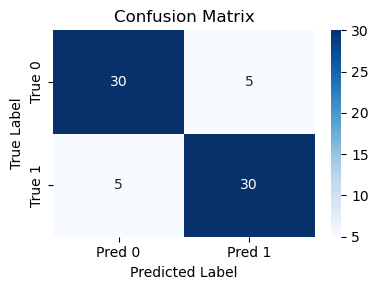

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


accuracy = svm_model.score(x_test, y_test)
f1 = f1_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)
confusionMatrix = confusion_matrix(y_test, svm_pred)

# Sensitivity is the same as recall for the positive class
sensitivity = recall

print(f"Accuracy: {accuracy: .4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")


plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------

#### Desicition Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc_model = dtc.fit(x_train, y_train)

# Prediction
dtc_pred = dtc_model.predict(x_test)
dtc_model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy:  0.8000
Precision: 0.7692
Recall: 0.8571
Sensitivity: 0.8571
F1-score: 0.8108


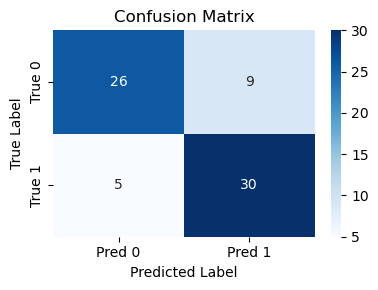

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


accuracy = dtc_model.score(x_test, y_test)
f1 = f1_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred)
recall = recall_score(y_test, dtc_pred)
confusionMatrix = confusion_matrix(y_test, dtc_pred)

# Sensitivity is the same as recall for the positive class
sensitivity = recall

print(f"Accuracy: {accuracy: .4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")


plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------

#### Ensemble technique

#### Max Voting

Accuracy: 0.8429
Precision: 0.8333
Recall: 0.8571
Sensitivity: 0.8571
F1-score: 0.8451


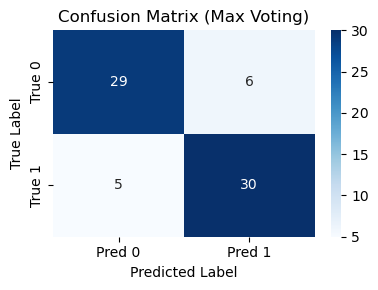

In [22]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('knn', knn_Model),
        ('svm', svm_model),
        ('dtc', dtc_model)
    ],
    voting='hard'  # 'hard' = max voting, 'soft' = average probabilities
)

voting_model = voting_model.fit(x_train, y_train)

voting_predictions = voting_model.predict(x_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix



# Evaluate
accuracy = voting_model.score(x_test, y_test)
precision = precision_score(y_test, voting_predictions)
recall = recall_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions)
confusionMatrix = confusion_matrix(y_test, voting_predictions)
sensitivity = recall


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")


plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix (Max Voting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



#### Boosting

Accuracy: 0.8429
Precision: 0.8158
Recall: 0.8857
Sensitivity: 0.8857
F1-score: 0.8493


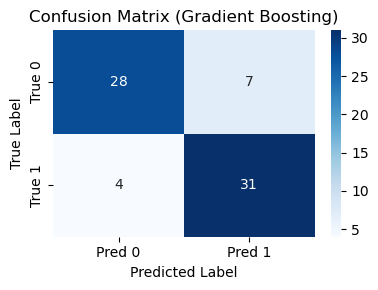

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

# Predict
gb_pred = gb.predict(x_test)

# Evaluate
accuracy = gb.score(x_test, y_test)
precision = precision_score(y_test, gb_pred)
recall = recall_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
confusionMatrix = confusion_matrix(y_test, gb_pred)
sensitivity = recall

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix (Gradient Boosting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Bagging

Accuracy: 0.8286
Precision: 0.8108
Recall: 0.8571
Sensitivity: 0.8571
F1-score: 0.8333


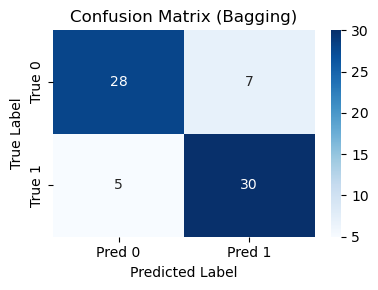

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Use Decision Tree as base estimator for bagging
bagging = BaggingClassifier(
    n_estimators=50,
    random_state=42
)
bagging.fit(x_train, y_train)

# Predict
bagging_pred = bagging.predict(x_test)

# Evaluate
accuracy = bagging.score(x_test, y_test)
precision = precision_score(y_test, bagging_pred)
recall = recall_score(y_test, bagging_pred)
f1 = f1_score(y_test, bagging_pred)
confusionMatrix = confusion_matrix(y_test, bagging_pred)
sensitivity = recall

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix (Bagging)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

####  Stacking

Accuracy: 0.8429
Precision: 0.8333
Recall: 0.8571
Sensitivity: 0.8571
F1-score: 0.8451


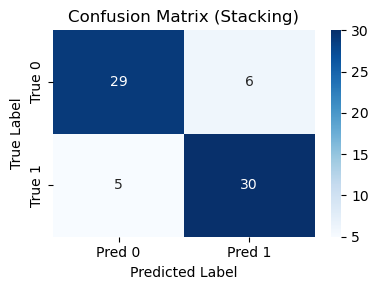

In [27]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base estimators
estimators = [
    ('knn', knn_Model),
    ('svm', svm_model),
    ('dtc', dtc_model)
]

# Define stacking classifier with logistic regression as final estimator
stacking_clf = StackingClassifier(
    estimators = [
    ('knn', knn_Model),
    ('svm', svm_model),
    ('dtc', dtc_model)
    ],
    final_estimator=LogisticRegression(random_state=42),
    passthrough=False,
    cv=5
)

# Fit stacking classifier
stacking_clf.fit(x_train, y_train)

# Predict
stacking_pred = stacking_clf.predict(x_test)

# Evaluate
accuracy = stacking_clf.score(x_test, y_test)
precision = precision_score(y_test, stacking_pred)
recall = recall_score(y_test, stacking_pred)
f1 = f1_score(y_test, stacking_pred)
confusionMatrix = confusion_matrix(y_test, stacking_pred)
sensitivity = recall

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix (Stacking)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### ANN

Accuracy: 0.8143
Precision: 0.8235
Recall: 0.8000
Sensitivity: 0.8000
F1-score: 0.8116


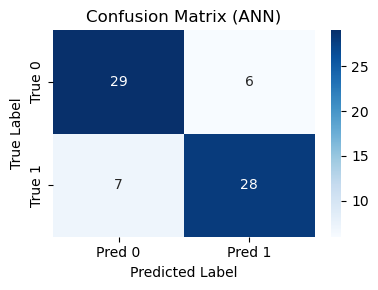

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Create and train the ANN 
ann = MLPClassifier(hidden_layer_sizes=(64, 32), 
                    activation='relu', 
                    solver='adam', 
                    random_state=42, 
                    max_iter=1000)
ann.fit(x_train, y_train)

# Predict
ann_pred = ann.predict(x_test)

# Evaluate
accuracy = ann.score(x_test, y_test)
precision = precision_score(y_test, ann_pred)
recall = recall_score(y_test, ann_pred)
f1 = f1_score(y_test, ann_pred)
confusionMatrix = confusion_matrix(y_test, ann_pred)
sensitivity = recall

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix (ANN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()